# Detector de Fraude de Cartão de Crédito

A base de dados utilizada é de 2013 e contém transações reais realizadas por titulares de cartões europeus.

Os dados foram coletados ao longo de dois dias de transações, totalizando 284.807 registros, dos quais 492 são fraudes. A base de dados está desbalanceada, exigindo um tratamento de dados mais cuidadoso.

Devido a questões de segurança, a base de dados contém apenas variáveis de entrada numéricas, resultantes de uma transformação por Análise de Componentes Principais (PCA). Os recursos V1, V2,... V28 representam os principais componentes obtidos com PCA, enquanto os únicos recursos não transformados são 'Time' (Tempo) e 'Amount' (Quantidade). 

A variável de resposta é 'Class' (Classe), que assume o valor 1 em caso de fraude e 0 caso contrário.

Link da base de dados: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Pré-Processamento de dados

In [91]:
#Importando as bibliotecas para pré-processamento
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Recebendo a base de dados


df = pd.read_csv('creditcard.csv')
df_original = df.copy()

#Somente para tirar os avisos de "Erro"
import warnings
warnings.filterwarnings("ignore")

In [2]:
targets_df = df_original['Class']
features_df = df_original.drop('Class', axis = 1)

In [3]:
#Visualizando as primeiras linhas
df_original.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#Informações gerais da base de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Esta base de dados possui <b> 284.807 </b> linhas e <b>31 </b> colunas. <br>
<b>Não</b> possui dados o tipo como objeto, portanto não será necessário a conversão

In [5]:
#Verificando se possui dados nulos
df_original.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não possuem valores nulos

In [6]:
#Descrição da base de dados
df_original.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Verificando a quantidade de Fraudes e não fraudes
print('Fraude', round(df_original['Class'].value_counts()[1]/len(df) * 100,2), '%')
print('Não fraude', round(df_original['Class'].value_counts()[0]/len(df) * 100,2), '%')

Fraude 0.17 %
Não fraude 99.83 %


Text(0.5, 1.0, 'Classificação da Distribuição de FRAUDES \n (0: Não Fraude || 1: Fraude)')

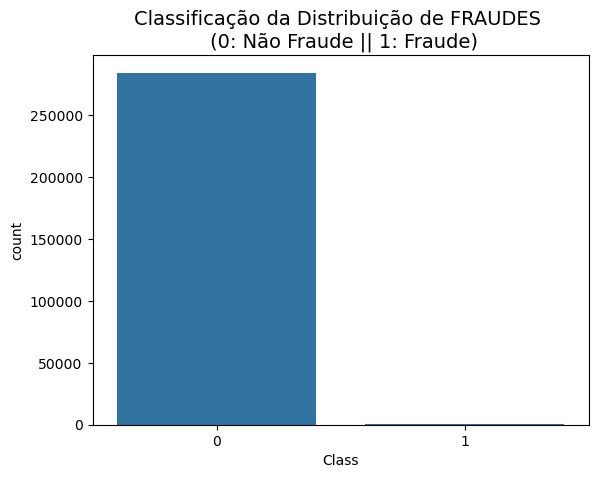

In [8]:
#Exibição do gráfico
sns.countplot(x='Class', data=df_original)
plt.title('Classificação da Distribuição de FRAUDES \n (0: Não Fraude || 1: Fraude)', fontsize=14)

Base dados muito desbalanceada contendo 492 são fraudes e 284.315 não fraudes

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <BarContainer object of 10 artists>)

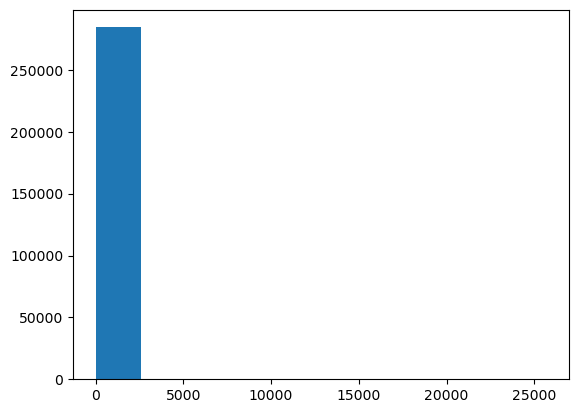

In [9]:
plt.hist(x= df_original['Amount'])

Não possui valores negativos 

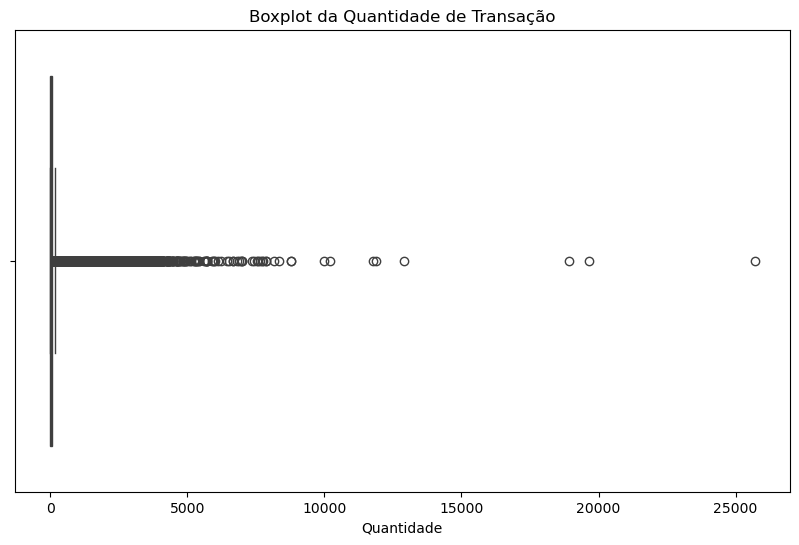

In [10]:
#Verificando os outliers e a distribuição dos dados.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['Amount'])
plt.title('Boxplot da Quantidade de Transação')
plt.xlabel('Quantidade')
plt.show()

O gráfico revela que a maioria das transações possui valores baixos, com a mediana próxima de zero, indicando que metade das transações está concentrada em valores muito baixos. A caixa do gráfico, que representa o intervalo interquartil (IQR), mostra que 50% dos dados estão dentro de um intervalo estreito, reforçando a baixa variabilidade dos valores das transações. Os bigodes do gráfico são curtos, sugerindo que a maioria dos dados está próxima da mediana. No entanto, há vários outliers identificados, representando transações com valores excepcionalmente altos. Esses outliers podem indicar transações excepcionais ou possíveis erros nos dados que necessitam de investigação.

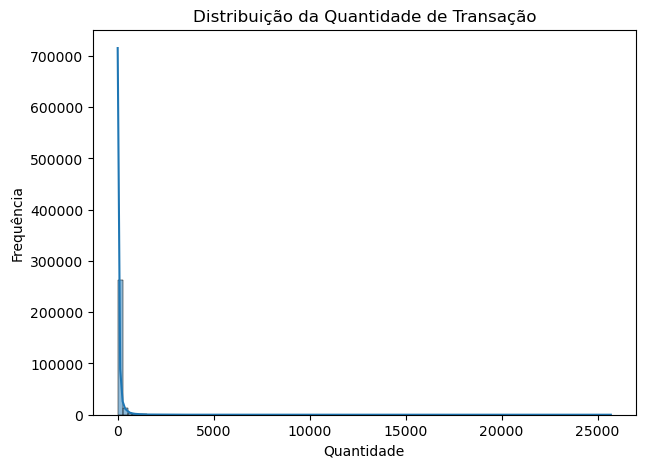

In [11]:
plt.figure(figsize=(7, 5))
sns.histplot(df_original['Amount'], bins=100, kde=True)
plt.title('Distribuição da Quantidade de Transação')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

A análise da distribuição da quantidade de transações revela que a maior parte das transações está concentrada em quantidades menores, como indicado pela alta frequência no início do eixo x (quantidade). À medida que a quantidade aumenta, a frequência das transações diminui, sugerindo que transações de maior quantidade são menos comuns. A distribuição é assimétrica, com uma cauda longa à direita, o que é típico em dados financeiros, onde poucas transações de alto valor ocorrem, mas a maioria das transações são de valores menores. A linha KDE (Kernel Density Estimate) sobreposta ao histograma ajuda a visualizar a densidade de probabilidade da distribuição, suavizando-a e auxiliando na identificação de padrões ou anomalias.



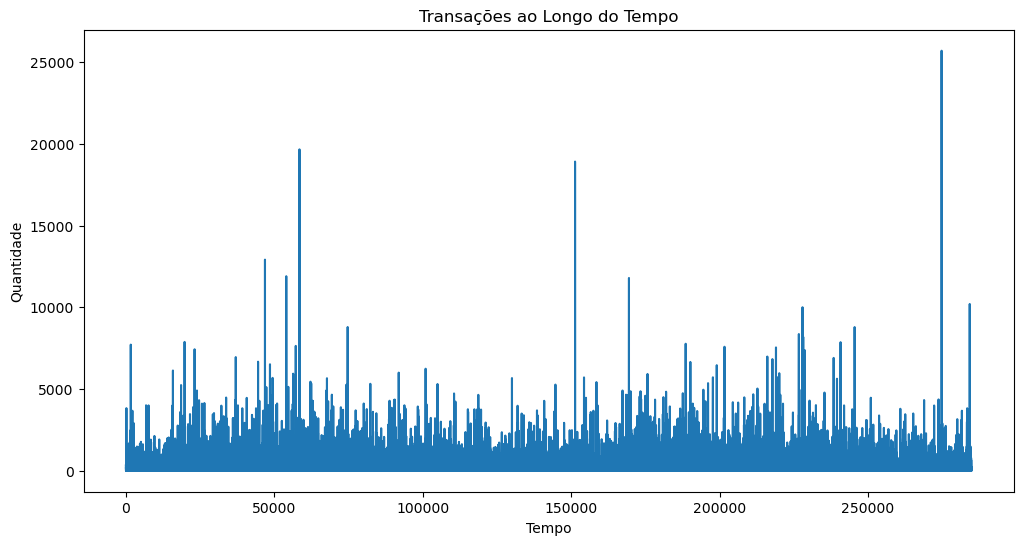

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(df_original)), y='Amount', data=df_original)
plt.title('Transações ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.show()

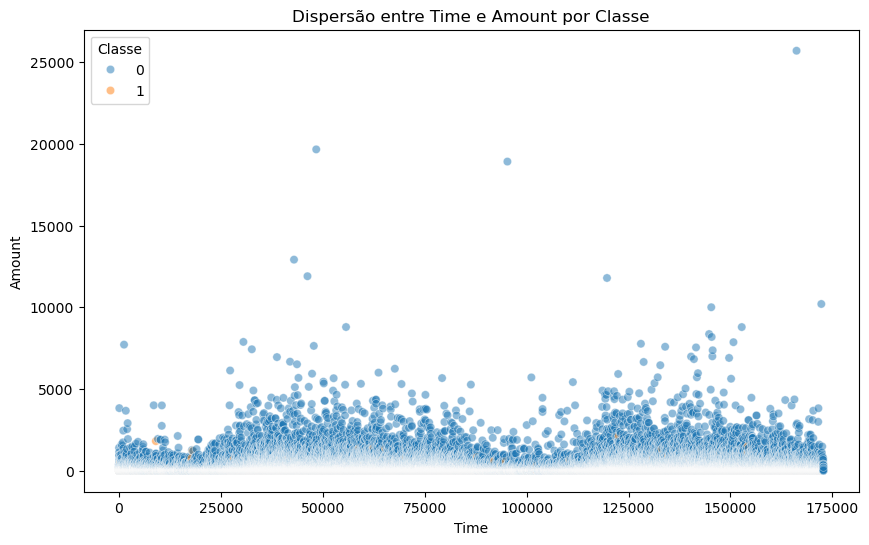

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df_original, alpha=0.5)
plt.title('Dispersão entre Time e Amount por Classe')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Classe')
plt.show()

## Redução de dados

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

df_reduzida = df_original.copy()

def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    display(df.describe())
    display(df.head(10))
    print("\n")

def VisualizePcaProjection(finalDf, targetColumn):
    fig = px.scatter_3d(finalDf, x='principal component 1',
                        y='principal component 2', z='principal component 3',
                        color=targetColumn, color_continuous_scale='Viridis',
                        labels={'principal component 1': 'Principal Component 1',
                                'principal component 2': 'Principal Component 2',
                                'principal component 3': 'Principal Component 3',
                                targetColumn: 'Target'})
    fig.update_layout(title='Component PCA', title_font_size=20)
    fig.show()

def VisualizePcaProjection_2components(finalDf, targetColumn):
    fig = px.scatter(finalDf, x='principal component 1',
                     y='principal component 2',
                     color=targetColumn, color_continuous_scale='Viridis',
                     labels={'principal component 1': 'Principal Component 1',
                             'principal component 2': 'Principal Component 2',
                             targetColumn: 'Target'})
    fig.update_layout(title='Component PCA', title_font_size=20)
    fig.show()

names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 
        'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24'
        'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 
        'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
        'V25', 'V26', 'V27', 'V28', 'Amount']

target = 'Class'

ShowInformationDataFrame(df_reduzida,"Dataframe original")


Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [15]:
df_reduzida

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Normalização utilizando Z-score

In [16]:
# Separating out the features
x = df_reduzida.loc[:, features].values

# Separating out the target
y = df_reduzida.loc[:,[target]].values

# Z-score normalization
x_zcore = StandardScaler().fit_transform(x)
normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
normalized1Df = pd.concat([normalized1Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized1Df,"Base de dados normalizada com Z-score")

Base de dados normalizada com Z-score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17,0.001727
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01,0.000000
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01,0.000000
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02,0.000000
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02,1.000000


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
5,-1.996541,-0.217475,0.581675,0.752585,-0.118833,0.305009,-0.022313,0.384936,0.217955,-0.517619,...,-0.283522,-0.771427,-0.042273,-0.613273,-0.446584,0.219637,0.628900,0.245636,-0.338556,0
6,-1.996499,0.627795,0.085389,0.029923,0.849383,0.139020,0.204695,-0.004170,0.067998,0.423218,...,-0.228334,-0.373032,-0.246780,-1.287973,1.439037,-0.533436,0.085492,0.015656,-0.333279,0
7,-1.996436,-0.328928,0.858692,0.708576,-0.347631,0.687512,0.321345,0.905860,-3.188229,0.560129,...,2.645889,-1.399276,0.092085,-1.072754,-0.796633,-0.107075,-2.990154,-3.288083,-0.190107,0
8,-1.996436,-0.456573,0.173291,-0.074653,-0.191774,1.934149,2.793594,0.299206,0.712592,-0.356851,...,-0.099963,-0.369425,-0.327055,1.670269,0.715943,-0.796633,0.029104,0.431420,0.019392,0
9,-1.996394,-0.172698,0.678005,0.688781,-0.156927,0.361792,-0.185219,0.526706,0.058223,-0.670587,...,-0.336156,-0.873298,-0.193438,-0.635767,-0.133773,0.195342,0.610010,0.251681,-0.338516,0


## Matriz de correlação

<Axes: >

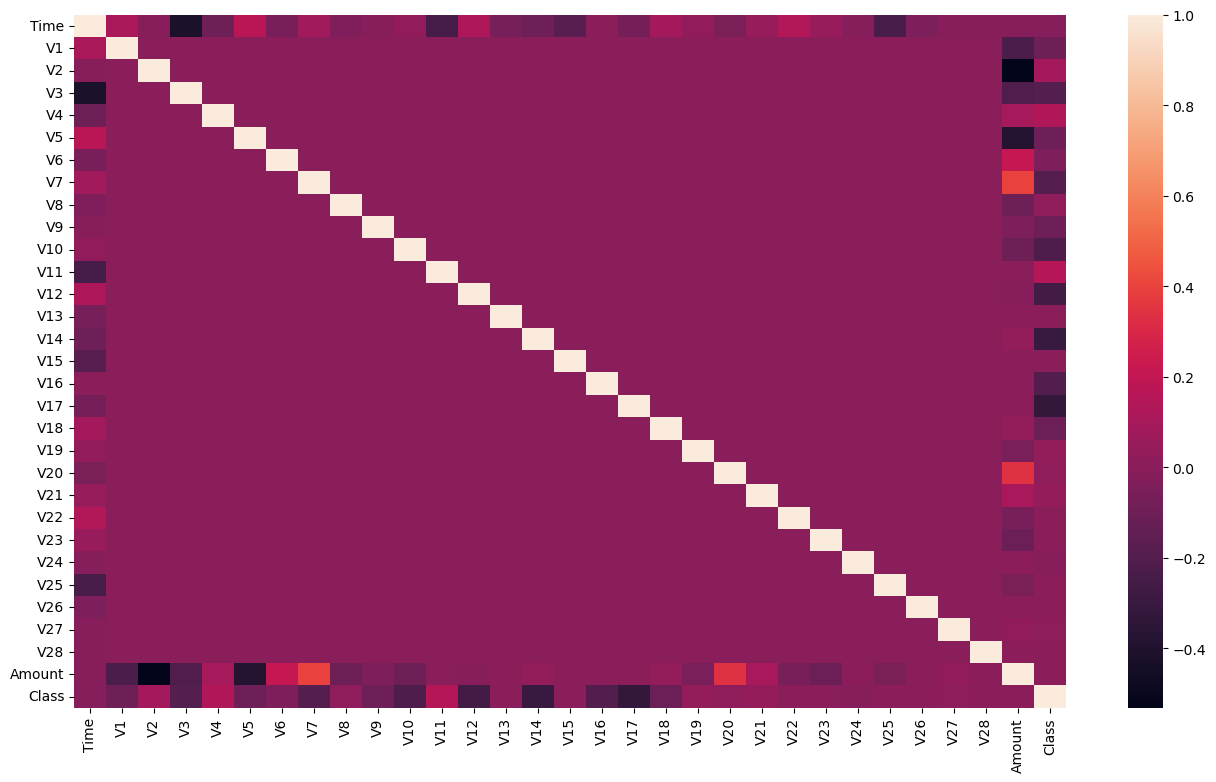

In [17]:
# Mapa de calor
plt.figure(figsize=(16, 9))

# Criação da matriz de correlação da base de dados
sns.heatmap(normalized1Df.corr())

A matriz de correlação utiliza uma escala de cores para ilustrar a força das correlações entre variáveis. Cores mais escuras, próximas do roxo, indicam correlações fracas ou inexistentes, enquanto cores mais claras, próximas do vermelho, indicam correlações mais fortes. A diagonal principal da matriz, que vai do canto superior esquerdo ao inferior direito, sempre apresenta o valor 1.0, pois representa a correlação de cada variável consigo mesma. Valores próximos de +1 indicam uma forte correlação positiva, onde o aumento de uma variável está associado ao aumento da outra, enquanto valores próximos de -1 indicam uma forte correlação negativa, onde o aumento de uma variável está associado à diminuição da outra. Valores próximos de 0 indicam pouca ou nenhuma correlação linear entre as variáveis. Essa matriz pode ser utilizada para identificar quais variáveis possuem relações significativas, sendo úteis para análises futuras ou modelos preditivos.

A única variável intercorrelacionada entre outras é o Valor da transação. Porém, esta variável não apresenta correlação com a variável alvo, portanto também será removida.

In [18]:
# Coeficiente de correlação da classe com as demais colunas
coeficiente_correlacao = normalized1Df.corr()['Class']

# Copia da base de dados
df_correlacao = normalized1Df.copy()

df_correlacao

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


In [19]:
df_correlacao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


<Axes: >

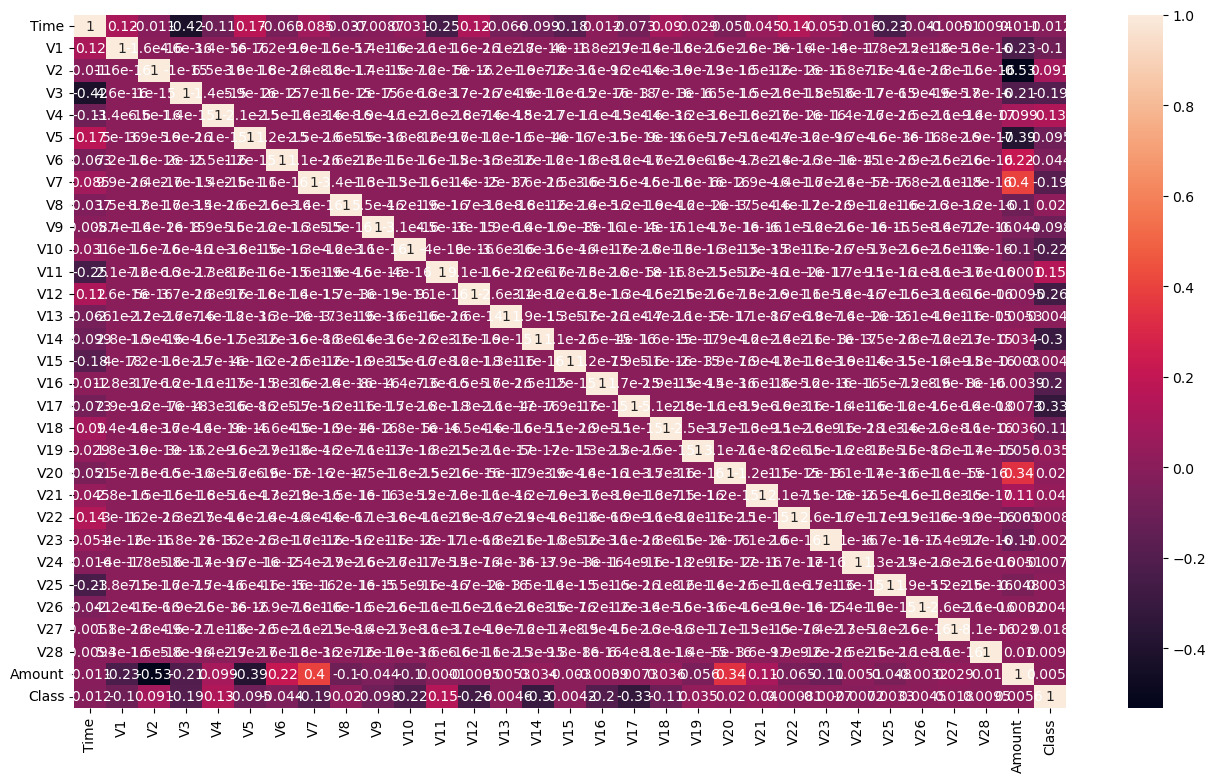

In [20]:
plt.figure(figsize=(16, 9))

# Matriz de correlação da cópia da base de dados (somente com as colunas de maior correlação)
sns.heatmap(df_correlacao.corr(), annot=True)

In [24]:
# PCA projection
pca = PCA(n_components=2)
principalComponentsPCAprojection = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponentsPCAprojection[:,0:2],
                            columns = ['principal component 1',
                                    'principal component 2'])
finalDf = pd.concat([principalDf, normalized1Df[[target]]], axis = 1)
ShowInformationDataFrame(finalDf,"Dataframe PCA")

#Deixando a exibição do PCA comentado pois estava dando interferencia no proprio computador utilizado
#VisualizePcaProjection_2components(finalDf, target)

Explained variance per component:
[0.9999722492777506, 2.7738219235281223e-05]



Dataframe PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   principal component 1  284807 non-null  float64
 1   principal component 2  284807 non-null  float64
 2   Class                  284807 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 6.5 MB
None


,principal component 1,principal component 2,Class
count,284807.000000,2.848070e+05,284807.000000
mean,0.000000,7.459717e-15,0.001727
std,47488.146036,2.501097e+02,0.041527
min,-77978.133114,-9.362777e+01,0.000000
25%,-44506.643800,-8.229195e+01,0.000000
50%,10121.855369,-6.602279e+01,0.000000
75%,40612.356256,-1.112058e+01,0.000000
max,94813.862881,2.560719e+04,1.000000


,principal component 1,principal component 2,Class
0,94813.862881,55.979467,0
1,94813.854640,-90.953660,0
2,94812.875662,285.024840,0
3,94812.861396,29.859853,0
4,94811.858408,-23.652028,0
5,94811.854708,-89.974022,0
6,94809.854754,-88.652573,0
7,94806.856760,-52.843666,0
8,94806.859674,-0.441327,0
9,94804.854702,-89.964132,0


A tabela de estatísticas no topo do gráfico apresenta medidas como contagem, média, desvio padrão, mínimo, percentis (25%, 50%, 75%) e máximo para os componentes principais 1 e 2, facilitando a compreensão da distribuição dos dados. O gráfico de dispersão abaixo da tabela exibe os pontos de dados em relação aos eixos ‘Principal Component 1’ e ‘Principal Component 2’, com pontos codificados por cores baseados em uma variável alvo, permitindo a visualização de agrupamentos ou padrões. A barra de cores à direita do gráfico indica a escala de valores da variável alvo, variando aproximadamente de -0.8 a 0.8, ajudando a identificar visualmente a distribuição dos dados em relação aos componentes principais.

## Normalização Min-Max

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Separating out the features
x = df_reduzida.loc[:, features].values

# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)
print("Dataframe Min-Max Normalized \n")
display(normalized2Df)

Dataframe Min-Max Normalized 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


<Axes: >

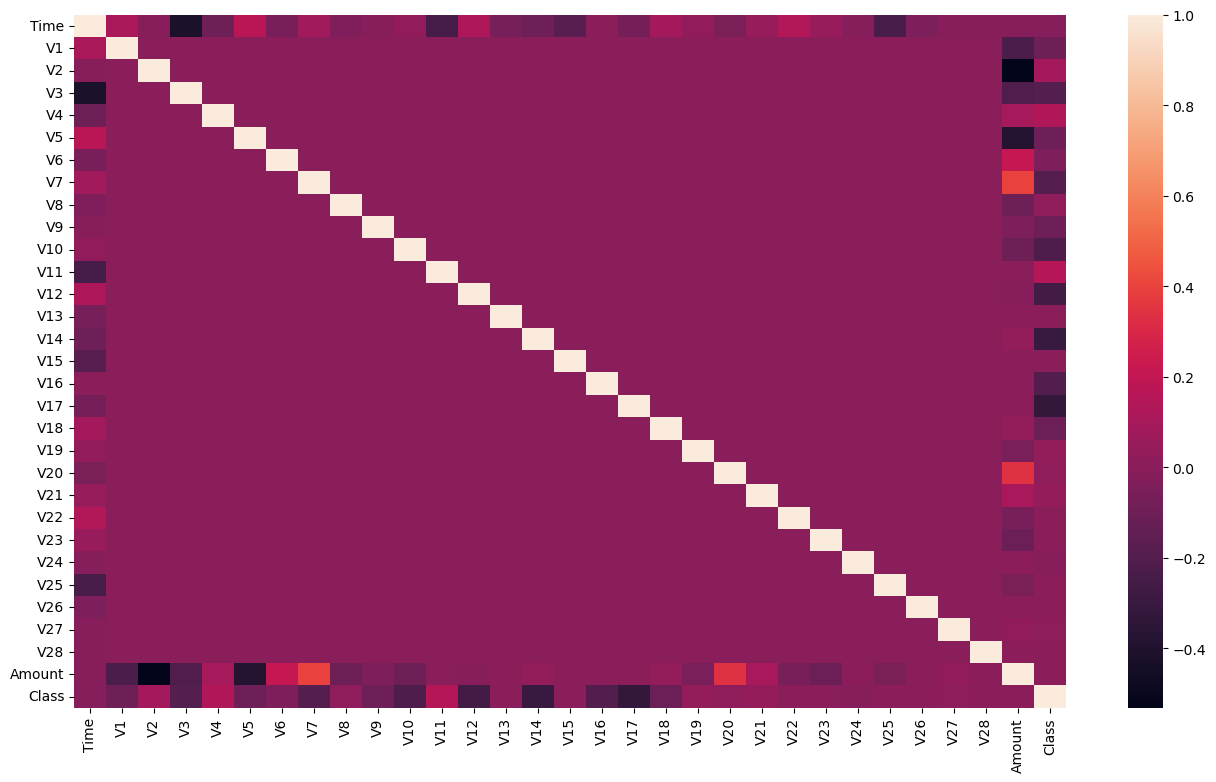

In [26]:
# Mapa de calor
plt.figure(figsize=(16, 9))

# Criação da matriz de correlação da base de dados
sns.heatmap(normalized2Df.corr())

In [27]:
# Coeficiente de correlação da classe com as demais colunas
coeficiente_correlacao_min_max = normalized2Df.corr()['Class']

# Copia da base de dados
coeficiente_correlacao_min_max = normalized2Df.copy()

# Retirando as colunas com correlação menos que 0,13
for i in normalized2Df.columns:
    if abs(coeficiente_correlacao[i]) < 0.13:
        coeficiente_correlacao_min_max.drop(columns=[i], inplace=True)

<Axes: >

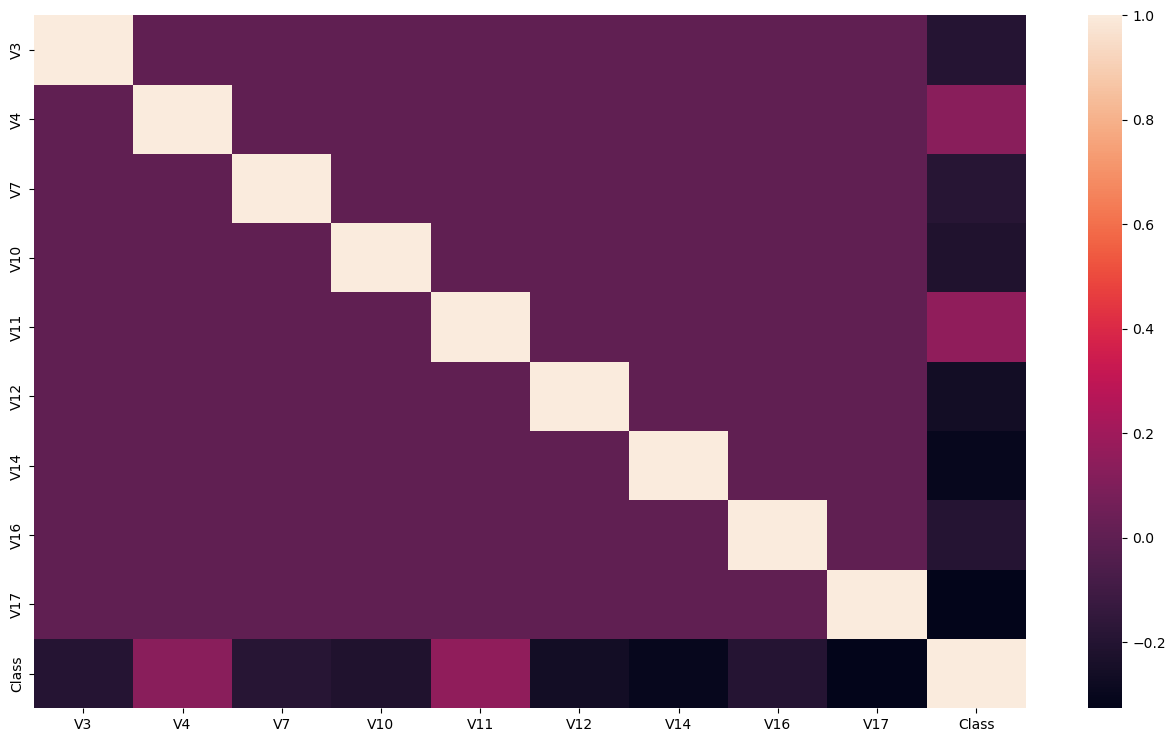

In [28]:
# Mapa de calor
plt.figure(figsize=(16, 9))

# Criação da matriz de correlação da base de dados
sns.heatmap(coeficiente_correlacao_min_max.corr())

In [30]:
# PCA projection
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:3],
                            columns = ['principal component 1',
                                      'principal component 2',
                                       'principal component 3'])
finalDf = pd.concat([principalDf, normalized2Df[[target]]], axis = 1)
ShowInformationDataFrame(finalDf,"Dataframe PCA")

#Deixando a exibição do PCA comentado pois estava dando interferencia no proprio computador utilizado
#VisualizePcaProjection(finalDf, target)

Explained variance per component:
[0.9999722492777506, 2.7738219235281196e-05, 1.6425147616712877e-09]



Dataframe PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   principal component 1  284807 non-null  float64
 1   principal component 2  284807 non-null  float64
 2   principal component 3  284807 non-null  float64
 3   Class                  284807 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.7 MB
None


,principal component 1,principal component 2,principal component 3,Class
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000
mean,0.000000,5.824711e-15,-7.983430e-18,0.001727
std,47488.146036,2.501097e+02,1.924624e+00,0.041527
min,-77978.133114,-9.362777e+01,-6.744513e+00,0.000000
25%,-44506.643800,-8.229195e+01,-1.538724e+00,0.000000
50%,10121.855369,-6.602279e+01,1.278882e-01,0.000000
75%,40612.356256,-1.112058e+01,9.842906e-01,0.000000
max,94813.862881,2.560719e+04,4.567284e+01,1.000000


,principal component 1,principal component 2,principal component 3,Class
0,94813.862881,55.979467,0.743474,0
1,94813.854640,-90.953660,-1.430687,0
2,94812.875662,285.024840,0.258239,0
3,94812.861396,29.859853,0.468158,0
4,94811.858408,-23.652028,0.875503,0
5,94811.854708,-89.974022,0.269396,0
6,94809.854754,-88.652573,-1.465263,0
7,94806.856760,-52.843666,0.581406,0
8,94806.859674,-0.441327,0.672514,0
9,94804.854702,-89.964132,0.236282,0


## Medidas de Tendência Central

### Média, Moda, Mediana, Ponto Médio  

In [265]:
measures = {
    'Feature': [],
    'Mean': [],
    'Mode': [],
    'Median': [],
    'Ponto Médio': []
}

for column in df_reduzida.columns:
    if df_reduzida[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Mean'].append(df_reduzida[column].mean())
        measures['Mode'].append(df_reduzida[column].mode().values[0])
        measures['Median'].append(df_reduzida[column].median())
        measures['Ponto Médio'].append((df_reduzida[column].max() + df_reduzida[column].min())/2)


table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Mean': measures['Mean'],
    'Mode': measures['Mode'],
    'Median' : measures['Median'],
    'Ponto Médio' : measures['Ponto Médio']
})

display(table_measures)

,Feature,Mean,Mode,Median,Ponto Médio
0,Time,9.481386e+04,163152.000000,84692.000000,86396.000000
1,V1,1.177057e-15,1.245674,0.018109,-26.976290
2,V2,3.377989e-16,-0.326668,0.065486,-25.328999
3,V3,-1.399096e-15,-2.752041,0.179846,-19.471515
4,V4,2.093655e-15,-0.842316,-0.019847,5.596086
5,V5,1.005613e-15,-0.562777,-0.054336,-39.470820
6,V6,1.496843e-15,-1.011073,-0.274187,23.570560
7,V7,-5.636302e-16,-0.432126,0.040103,38.516126
8,V8,1.136641e-16,-0.160211,0.022358,-26.604755
9,V9,-2.411545e-15,0.170362,-0.051429,1.080464


## Medidas de dispersão

### Amplitude, Desvio Padrão  

In [266]:
measures = {
    'Feature': [],
    'Range': [],
    'Standard Deviation': [],
}


for column in df_reduzida.columns:
    if df_reduzida[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Range'].append(df_reduzida[column].max() - df_reduzida[column].min())
        measures['Standard Deviation'].append(df_reduzida[column].std())


table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Range': measures['Range'],
    'Standard Deviation': measures['Standard Deviation']
})

display(table_measures)

,Feature,Range,Standard Deviation
0,Time,172792.000000,47488.145955
1,V1,58.862440,1.958696
2,V2,94.773457,1.651309
3,V3,57.708148,1.516255
4,V4,22.558515,1.415869
5,V5,148.544973,1.380247
6,V6,99.462131,1.332271
7,V7,164.146736,1.237094
8,V8,93.223927,1.194353
9,V9,29.029061,1.098632


## Medidas de Posição Relativa
### 
Z-Score, Quantis

In [267]:
measures = {
    'Feature': [],
    'Z-Score': [],
    '25th Percentile': [],
    '50th Percentile': [],
    '75th Percentile': []
}

for column in df_reduzida.columns:
    if df_reduzida[column].dtype in [int, float]:
        measures['Feature'].append(column)

        # Z-Score
        z_score = (df_reduzida[column] - df_reduzida[column].mean()) / df_reduzida[column].std()
        measures['Z-Score'].append(z_score.iloc[0])

        # Quantiles
        q25 = np.percentile(df_reduzida[column], 25)
        q50 = np.percentile(df_reduzida[column], 50)
        q75 = np.percentile(df_reduzida[column], 75)
        measures['25th Percentile'].append(q25)
        measures['50th Percentile'].append(q50)
        measures['75th Percentile'].append(q75)

table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Z-Score': measures['Z-Score'],
    '25th Percentile': measures['25th Percentile'],
    '50th Percentile': measures['50th Percentile'],
    '75th Percentile' : measures['75th Percentile']
})

display(table_measures)

,Feature,Z-Score,25th Percentile,50th Percentile,75th Percentile
0,Time,-0.224516,54201.500000,84692.000000,139320.500000
1,V1,0.552460,-0.920373,0.018109,1.315642
2,V2,0.029231,-0.598550,0.065486,0.803724
3,V3,0.331550,-0.890365,0.179846,1.027196
4,V4,0.813845,-0.848640,-0.019847,0.743341
5,V5,-0.300525,-0.691597,-0.054336,0.611926
6,V6,-0.166397,-0.768296,-0.274187,0.398565
7,V7,-0.136623,-0.554076,0.040103,0.570436
8,V8,0.166195,-0.208630,0.022358,0.327346
9,V9,0.010628,-0.643098,-0.051429,0.597139


## Medidas de Associação

### Covariância e Correlação

In [268]:
measures = {
    'Feature': [],
    'Covariance': [],
    'Correlation': []
}

for column in df_reduzida.columns:
    if df_reduzida[column].dtype in [int, float]:
        measures['Feature'].append(column)

        # Covariance
        cov_value = df_reduzida[column].cov(df_reduzida['Class'])
        measures['Covariance'].append(cov_value)

        # Correlation
        corr_value = df_reduzida[column].corr(df_reduzida['Class'])
        measures['Correlation'].append(corr_value)

table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Covariance':  measures['Covariance'],
    'Correlation': measures['Correlation']
})

display(table_measures)

,Feature,Covariance,Correlation
0,Time,-24.300717,-0.012323
1,V1,-0.008244,-0.101347
2,V2,0.006260,0.091289
3,V3,-0.012150,-0.192961
4,V4,0.007846,0.133447
5,V5,-0.005444,-0.094974
6,V6,-0.002415,-0.043643
7,V7,-0.009620,-0.187257
8,V8,0.000986,0.019875
9,V9,-0.004459,-0.097733


## Balanceamento de dados

In [32]:
df_pre_balaceada = df_reduzida.sample(frac=1)

# Separando os 492 elementois de fraude e não fraude
nao_fraude_df = df_pre_balaceada.loc[df['Class'] == 0][:492]
fraude_df = df_pre_balaceada.loc[df['Class'] == 1]

normal_distributed_df = pd.concat([fraude_df, nao_fraude_df])

df_balanceada = normal_distributed_df.sample(frac=1, random_state=42)

df_balanceada.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50443,44492.0,-0.701579,1.301346,2.566899,3.242614,0.159503,0.323710,0.633209,0.198231,-1.437390,...,-0.270916,-0.849728,0.014159,0.296751,-0.169666,-0.300977,0.082411,0.118883,25.40,0
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00,1
59951,49083.0,-1.202374,-0.080240,2.411775,0.997229,-0.138719,1.004739,-0.489696,0.692672,-0.035235,...,0.371906,0.837934,-0.058950,-0.705356,0.201671,0.017770,0.335230,0.154642,100.00,0
252124,155662.0,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,-4.441942,...,0.602291,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,0.77,1
153823,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1


Distribuição de classes igualitária
Class
0    0.5
1    0.5
Name: count, dtype: float64


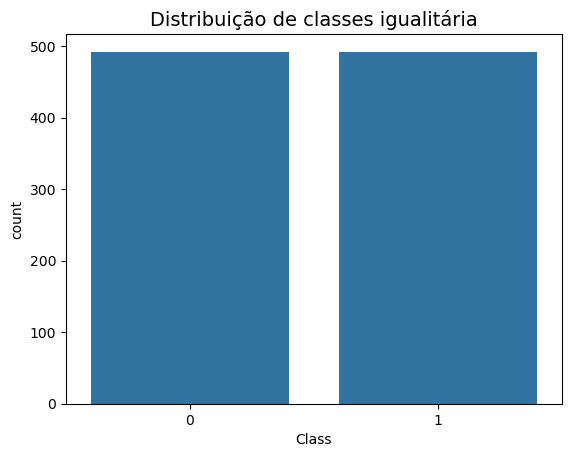

In [33]:
print('Distribuição de classes igualitária')
print(df_balanceada['Class'].value_counts()/len(df_balanceada))

sns.countplot(x='Class', data=df_balanceada)
plt.title('Distribuição de classes igualitária', fontsize=14)
plt.show()

## Clustererização

### K-Means

In [34]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

In [35]:
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points

In [36]:
def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    return fig

In [37]:
def plot_samples(projected, labels, title):
    labels = np.array(labels).flatten()
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

[9.99972249e-01 2.77382192e-05 1.64251476e-09]
(284807, 2)


C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



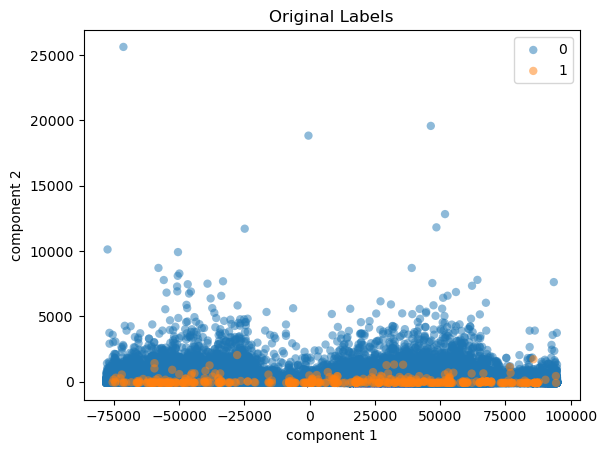

In [39]:
# Use PCA data
projected = principalComponentsPCAprojection
print(pca.explained_variance_ratio_)
print(projected.shape)
plot_samples(projected, targets_df, 'Original Labels')

C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



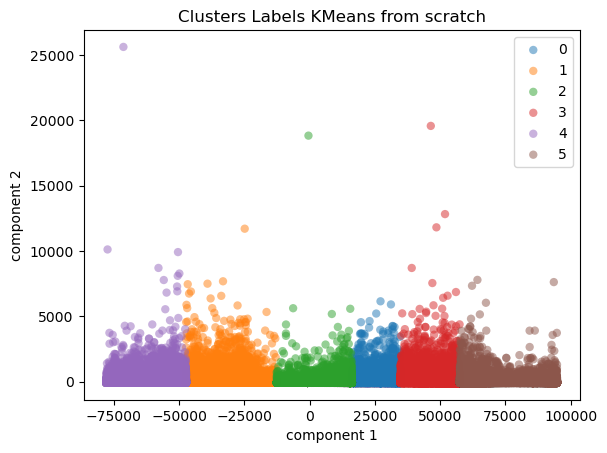

In [40]:
#Applying our kmeans function from scratch
labels = KMeans_scratch(projected,6,5)

#Visualize the results
plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

In [43]:
#Applying sklearn kemans function
kmeans = KMeans(n_clusters=6).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
#plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

#plt.show()

17445255434674.05


KeyboardInterrupt: 

## GMM

In [44]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

[9.99972249e-01 2.77382192e-05 1.64251476e-09]
(284807, 2)


C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



[0.00949207 0.11881488 0.15891716 0.14245599 0.03256161 0.10394955
 0.05021567 0.15021238 0.17571323 0.05766746]
[[ 9.22543902e+04 -7.82518336e+01]
 [-4.11189363e+04 -1.43575795e+01]
 [ 3.56407403e+04 -8.08893981e+01]
 [-4.82792516e+04 -7.50192785e+01]
 [ 1.29214674e+04  9.00449640e+02]
 [ 3.99715798e+04  9.16984713e+01]
 [-6.29139396e+04 -5.04129580e+01]
 [-2.34669439e+03 -8.70017430e+01]
 [ 3.83710371e+04 -4.47413870e+01]
 [-4.47861386e+04  1.83814861e+02]]


C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Berto\AppData\Local\Temp\ipykernel_9832\2122108531.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



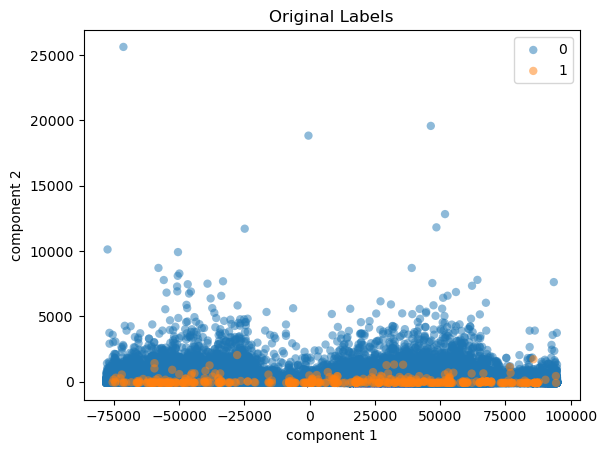

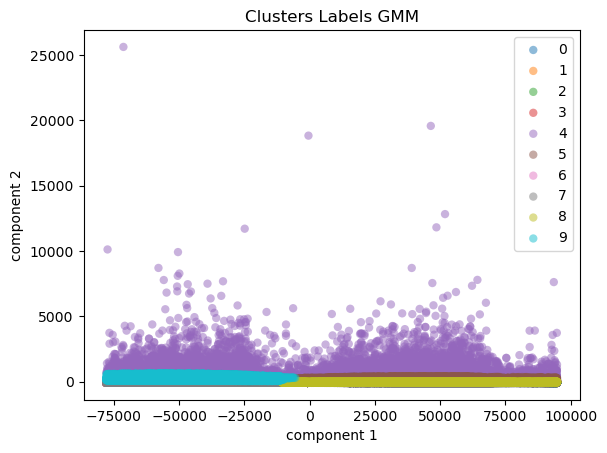

In [45]:
projected = principalComponentsPCAprojection
print(pca.explained_variance_ratio_)
print(projected.shape)
plot_samples(projected, targets_df, 'Original Labels')

#Applying sklearn GMM function
gm  = GaussianMixture(n_components=10).fit(projected)
print(gm.weights_)
print(gm.means_)
x = gm.predict(projected)

#Visualize the results sklearn
plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()

## Classificação

In [53]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from collections import Counter

Resampled dataset shape Counter({1: 395, 0: 395})


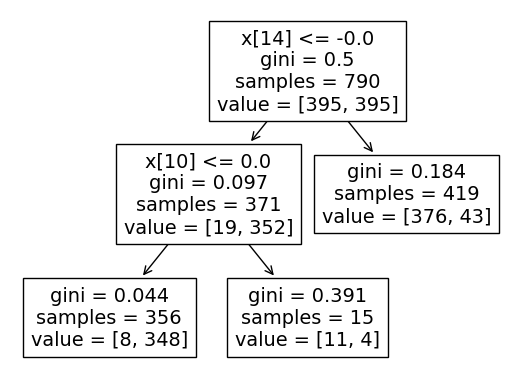

0.9289340101522843
[1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 1 0]
Acuraccy:
0.9289340101522843


In [94]:

x = df_balanceada.drop('Class', axis=1)
y = df_balanceada['Class']

x = normalize(x)

# Split the data - 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)    

sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(x_res, y_res)
tree.plot_tree(clf)
plt.show()

print(clf.score(x_test,y_test ))

predictions = clf.predict(x_test)
print(predictions)

result = clf.score(x_test, y_test)
print('Acuraccy:')
print(result)

In [95]:
print('Distribuição original das classes:', Counter(y))

Distribuição original das classes: Counter({0: 492, 1: 492})


In [96]:
smote = SMOTE()
x_res, y_res = smote.fit_resample(x_train, y_train)

# Verificando a nova distribuição das classes
print('Distribuição após o SMOTE:', Counter(y_res))

Distribuição após o SMOTE: Counter({1: 395, 0: 395})


(790, 30)
(197, 30)


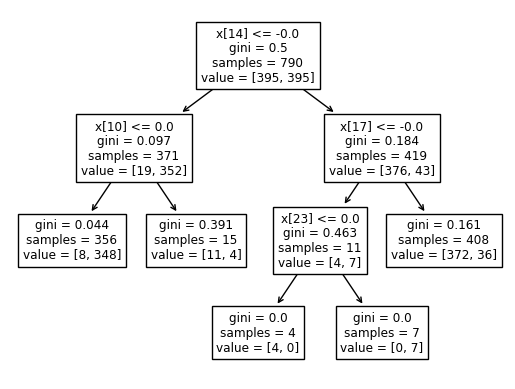

[1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 1 0]
Acuraccy:
0.9289340101522843


In [97]:
print(x_res.shape)
print(x_test.shape)

clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(x_res, y_res)
tree.plot_tree(clf)
plt.show()

predictions = clf.predict(x_test)
print(predictions)

result = clf.score(x_test, y_test)
print('Acuraccy:')
print(result)

## KNN

In [110]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.svm import SVC

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    cm = np.round(cm, 2)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

def load_dataset(dataset='cancer'):        
    if dataset == 'iris':
        # Load iris data and store in dataframe
        iris = datasets.load_iris()
        names = iris.target_names
        df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        df['target'] = iris.target
    elif dataset == 'cancer':
        # Load cancer data and store in dataframe
        cancer = datasets.load_breast_cancer()
        names = cancer.target_names
        df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
        df['target'] = cancer.target
    
    print(df.head())
    return names, df

Total samples: 984
Total train samples: 738
Total test  samples: 246
 -------------------Resampled dataset shape Counter({0: 371, 1: 371})
[[ 1.10499414  0.41234659 -0.06015253 ...  0.04091952  0.31150025
  -0.31427404]
 [ 0.54429183  0.3148903  -0.45916062 ... -0.06589011  0.10524874
  -0.32595138]
 [-1.15843952  0.70710292 -0.83468749 ... -0.05793185  0.0109362
  -0.20807634]
 ...
 [ 1.18389006  0.06873851  0.19675765 ... -0.06116225 -0.14764912
  -0.36230537]
 [-0.69423933  0.12714557 -0.15705391 ...  0.43118328  0.45874284
  -0.39168232]
 [ 1.65372423  0.79792454 -0.4835637  ... -0.07353442 -0.0697827
  -0.23550707]]
[  0   3   7   8   9  10  12  20  23  24  25  26  32  37  54  57  62  65
  68  71  74  81  83  85  86  88  91  93 100 102 107 108 109 119 120 121
 127 135 136 139 144 145 146 153 154 155 158 160 164 170 171 174 176 179
 184 186 187 188 189 198 201 204 205 211 215 218 219 222 224 232 233 240
 242 244 254 255 256 259 261 262 267 268 271 274 275 277 279 281 282 283
 284 2

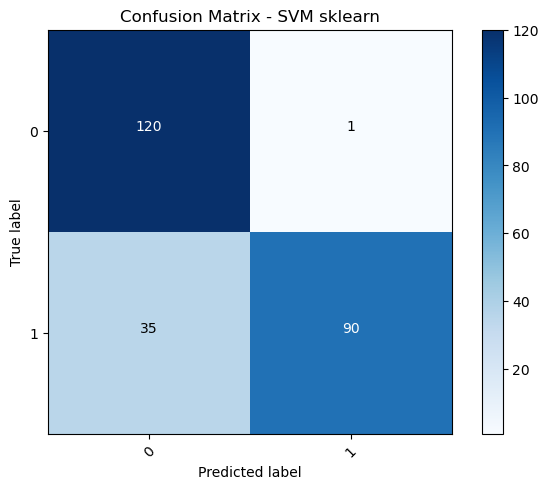

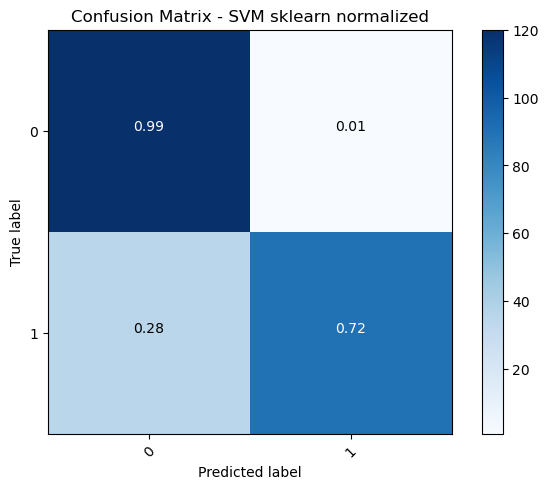

In [112]:
#load dataset
X = df_balanceada.drop('Class', axis=1)
y = df_balanceada['Class']

target_names = ['0','1']

print("Total samples: {}".format(X.shape[0]))

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

X = normalize(X)

# Scale the X data using Z-score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)
print(' -------------------Resampled dataset shape %s' % Counter(y_res))

# TESTS USING SVM classifier from sk-learn    
svm = SVC(kernel='poly') # poly, rbf, linear
# training using train dataset
svm.fit(X_train, y_train)
# get support vectors
print(svm.support_vectors_)
# get indices of support vectors
print(svm.support_)
# get number of support vectors for each class
print("Qtd Support vectors: ")
print(svm.n_support_)
# predict using test dataset
y_hat_test = svm.predict(X_test)

 # Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1))

# Get test confusion matrix    
cm = confusion_matrix(y_test, y_hat_test)        
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - SVM sklearn")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - SVM sklearn normalized" )  
plt.show()


## KNN com Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [115]:
x = df_balanceada
y = df_balanceada['Class']

x = normalize(x)

knn = KNeighborsClassifier(n_neighbors=5)

# Get test accuracy score
scores = cross_val_score(knn, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.02


Confusion matrix, without normalization
[[455  37]
 [ 79 413]]


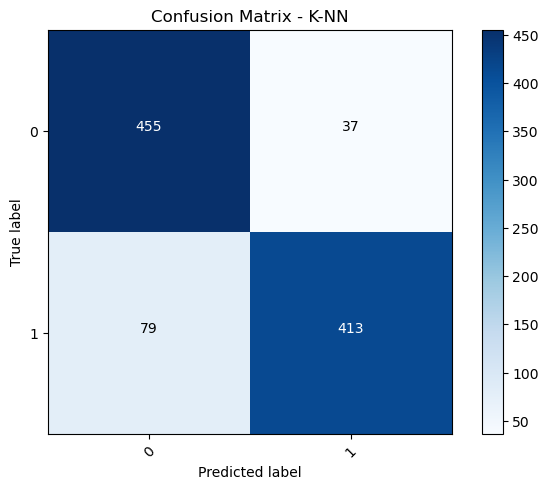

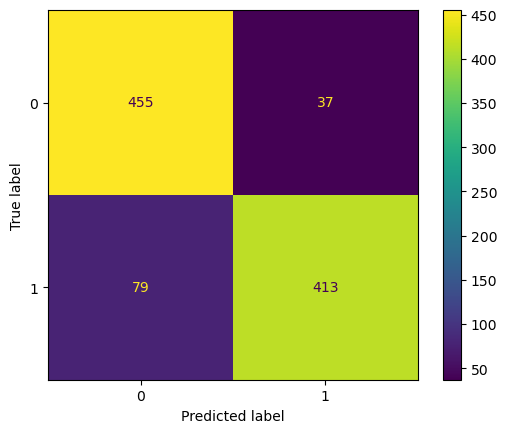

In [116]:
predict = cross_val_predict(knn, X, y, cv=5)

# Get test confusion matrix
cm = confusion_matrix(y, predict)
plot_confusion_matrix(cm, targets_df.drop_duplicates().values.tolist(), False, "Confusion Matrix - K-NN")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=targets_df.drop_duplicates().values.tolist())

disp.plot()
plt.show()

## SVM

In [117]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score

In [118]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    cm = np.round(cm, 2)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [119]:
x = df_balanceada
y = df_balanceada['Class']

x = normalize(x)

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando a nova distribuição das classes
print('Distribuição após o SMOTE:', Counter(y_res))

Distribuição após o SMOTE: Counter({0: 371, 1: 371})


Kernel: linear, C: 1
Accuracy SVM from sk-learn: 90.65%
F1 Score SVM from sk-learn: 0.91%
Kernel: linear, C: 5
Accuracy SVM from sk-learn: 91.46%
F1 Score SVM from sk-learn: 0.91%
Kernel: linear, C: 10
Accuracy SVM from sk-learn: 91.46%
F1 Score SVM from sk-learn: 0.91%
Kernel: rbf, C: 1
Accuracy SVM from sk-learn: 74.80%
F1 Score SVM from sk-learn: 0.73%
Kernel: rbf, C: 5
Accuracy SVM from sk-learn: 87.40%
F1 Score SVM from sk-learn: 0.87%
Kernel: rbf, C: 10
Accuracy SVM from sk-learn: 89.84%
F1 Score SVM from sk-learn: 0.90%
Kernel: poly, C: 1
Accuracy SVM from sk-learn: 51.22%
F1 Score SVM from sk-learn: 0.38%
Kernel: poly, C: 5
Accuracy SVM from sk-learn: 53.25%
F1 Score SVM from sk-learn: 0.42%
Kernel: poly, C: 10
Accuracy SVM from sk-learn: 53.25%
F1 Score SVM from sk-learn: 0.42%
Best parameters: 
Kernel:  linear, C: 5
Acurracy SVM from sk-learn: 91.46%
F1 Score SVM from sk-learn: 0.91%
Confusion matrix, without normalization
[[118   3]
 [ 18 107]]
Normalized confusion matrix
[[

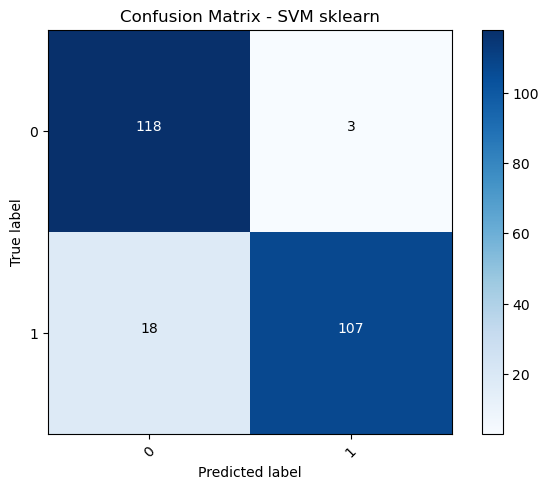

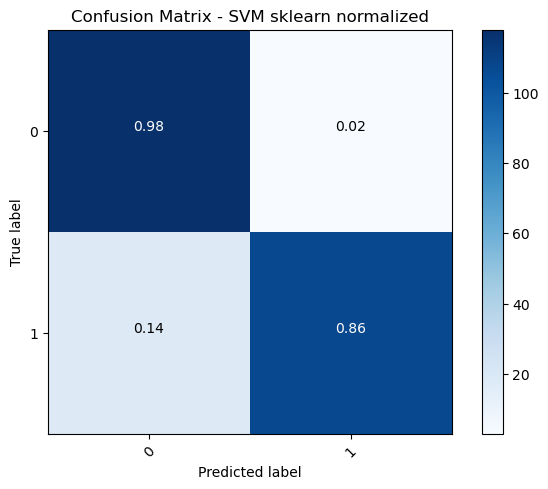

In [120]:
# Scale the X data using Z-score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10]}

best_accuracy = 0
best_f1_score = 0
best_params = {}

for kernels in parameters['kernel']:
    for C in parameters['C']:
        svm = SVC(kernel=kernels, C=C)
        svm.fit(X_train, y_res)
        y_hat_test = svm.predict(X_test)

        accuracy = accuracy_score(y_test, y_hat_test) * 100
        f1 = f1_score(y_test, y_hat_test, average='macro')
        print(f"Kernel: {kernels}, C: {C}")
        print("Accuracy SVM from sk-learn: {:.2f}%".format(accuracy))
        print("F1 Score SVM from sk-learn: {:.2f}%".format(f1))

        # Atualiza os melhores parâmetros se a acurácia atual for maior
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params = {'kernel': kernels, 'C': C}


svm = SVC(kernel=best_params['kernel'], C=best_params['C'])
svm.fit(X_train, y_res)
y_hat_test = svm.predict(X_test)

print("Best parameters: ")
print("Kernel:  " +  best_params['kernel'] + ', C: ' + str(best_params['C']))

# Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1))

# Get test confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cm, targets_df.drop_duplicates().values.tolist(), False, "Confusion Matrix - SVM sklearn")
plot_confusion_matrix(cm, targets_df.drop_duplicates().values.tolist(), True, "Confusion Matrix - SVM sklearn normalized" )
plt.show()

## Redes Neurais

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn.linear_model import SGDClassifier

In [122]:
x = df_balanceada
y = df_balanceada['Class']

x = normalize(x)

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando a nova distribuição das classes
print('Distribuição após o SMOTE:', Counter(y_res))

Distribuição após o SMOTE: Counter({0: 371, 1: 371})


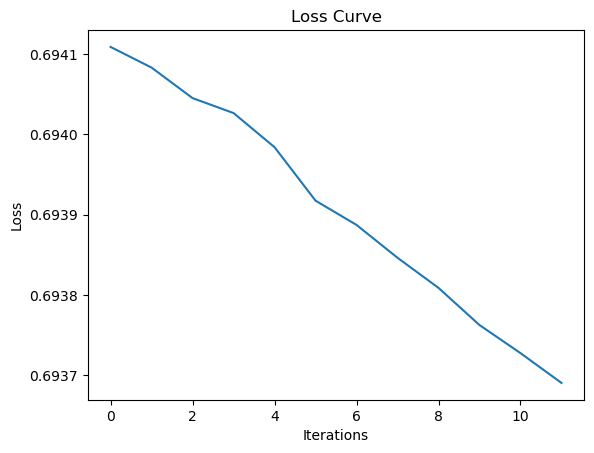

Accuracy: 0.491869918699187


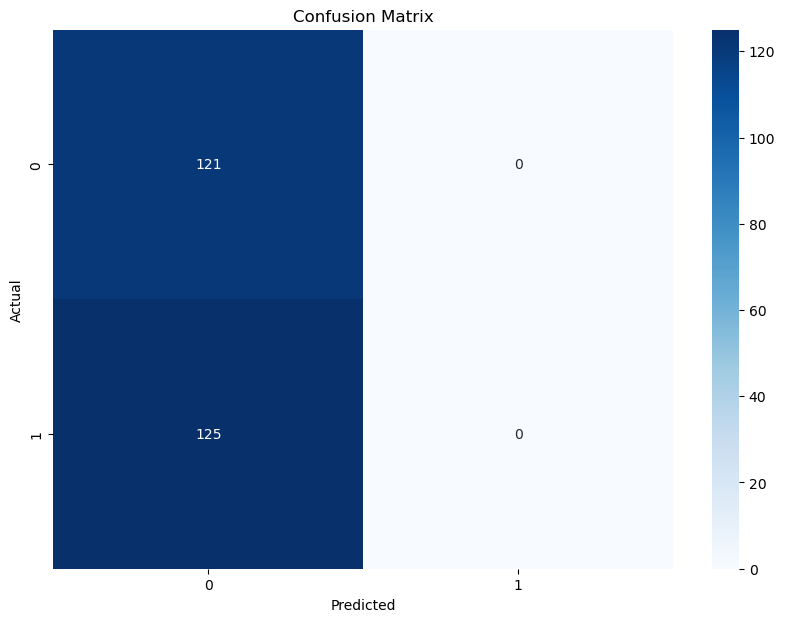

In [123]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(100, 10, 10), random_state=1)

# Treinamento do modelo com 'adam'
history = clf.fit(X_res, y_res)

# Plotando o gráfico de loss
plt.plot(clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Previsões
predict = clf.predict(X_test)

# Acurácia
score = accuracy_score(y_test, predict)
print(f"Accuracy: {score}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, predict)

# Visualizando a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

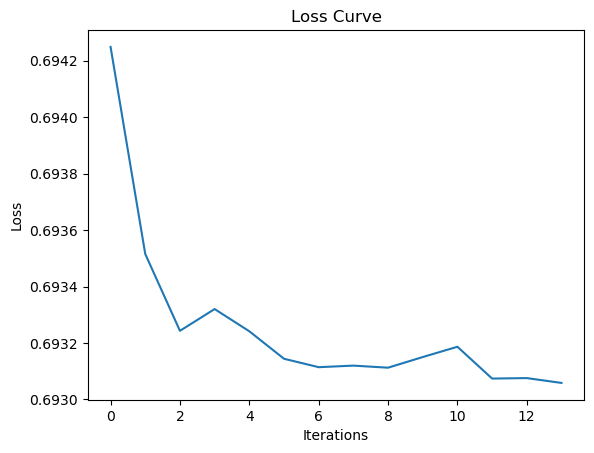

Accuracy: 0.508130081300813


Text(0.5, 47.7222222222222, 'Predicted')

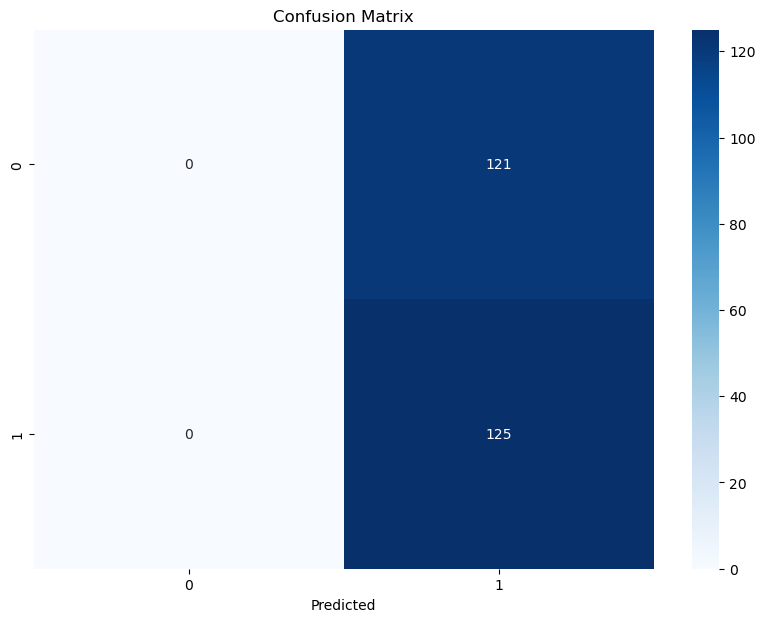

In [124]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 10, 10), random_state=1)

# Treinamento do modelo com 'adam'
history = clf.fit(X_res, y_res)

# Plotando o gráfico de loss
plt.plot(clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Previsões
predict = clf.predict(X_test)

# Acurácia
score = accuracy_score(y_test, predict)
print(f"Accuracy: {score}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, predict)

# Visualizando a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')